# Musical Attribute Analysis -  Data Analysis & Visualization 

I will be focusing this analysis to answer the following question: **"What makes up my musical taste?"**

We ended the previous [notebook](https://github.com/sreegp/Musical-Attribute-Analysis/blob/master/Musical%20Attribute%20Analysis%20-%20Data%20Collection%20%26%20Preprocessing.ipynb) with the dataset required for our analysis through data collection and preprocessing.

**Dataset Attributes per Song:**

- **Play Count:** Number of times the song was played

- **Acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- **Danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- **Energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

- **Instrumentalness:** Predicts whether a track contains no vocals. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

- **Key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

- **Liveness:** Detects the presence of an audience in the recording. A value above 0.8 provides strong likelihood that the track is live.

- **Loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Values typical range between -60 and 0 db.

- **Mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- **Speechiness:** Speechiness detects the presence of spoken words in a track.

- **Valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- **Popularity:** Popularity of the song as defined by Spotify's algorithms which take into account factors like play count over a timeframe

In [5]:
%matplotlib inline
import pandas as pd 
import numpy as np
from pprint import pprint
import json
import math
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import statistics
import csv

In [3]:
music_data = json.load(open('final_data.json'))
music_data = pd.DataFrame(music_data)

### Sample Song, with Audio Features

In [9]:
music_data.iloc[0] # example

acousticness                                                     0.46
album                           Coke Studio India Season 3: Episode 1
album_uri                        spotify:album:2CStgaiOhe1w4OXAoqP1gl
analysis_url        https://api.spotify.com/v1/audio-analysis/0Pua...
artist                                                    A.R. Rahman
artist_uri                      spotify:artist:1mYsTxnqsietFxj1OgoGbG
danceability                                                    0.318
duration_ms                                                    325787
energy                                                          0.508
id                                             0PuaYHseEiuGj3syu49k6G
instrumentalness                                             0.000121
key                                                                 1
liveness                                                        0.106
loudness                                                       -6.067
mode                

In [68]:
music_data_40 = music_data.loc[music_data['play_count'] > 39]

## Data Analysis: General Trends

We are going to start by looking at the a

In [4]:
avg_acousticness = np.average(music_data['acousticness'])
print("avg_acousticness: " + str(avg_acousticness))

avg_danceability  = np.average(music_data['danceability'])
print("avg_danceability: " + str(avg_danceability))

avg_energy   = np.average(music_data['energy'])
print( "avg_energy: " + str(avg_energy))

avg_instrumentalness   = np.average(music_data['instrumentalness'])
print( "avg_instrumentalness: " + str(avg_instrumentalness))

mode_key = statistics.mode(music_data['key'])
print( "mode_key: " + str (mode_key))

avg_liveness = np.average(music_data['liveness'])
print( "avg_liveness: " + str (avg_liveness))

avg_loudness = np.average(music_data['loudness'])
print( "avg_loudness: " + str(avg_loudness))

mode_mode = statistics.mode(music_data['mode'])
print( "mode_mode: " + str(mode_mode))

avg_popularity  = np.average(music_data['popularity'])
print( "avg_popularity:" + str(avg_popularity))

avg_speechiness  = np.average(music_data['speechiness'])
print( "avg_speechiness:" + str(avg_speechiness))

avg_valence  = np.average(music_data['valence'])
print( "avg_valence: " + str(avg_valence))

mode_time_signature = statistics.mode(music_data['time_signature'])
print("mode_time_signature: " + str(mode_time_signature))


avg_acousticness: 0.460103940804
avg_danceability: 0.529243483557
avg_energy: 0.49125952497
avg_instrumentalness: 0.217682307393
mode_key: 0
avg_liveness: 0.162953349574
avg_loudness: -10.5854872107
mode_mode: 1
avg_popularity:34.8428745432
avg_speechiness:0.0681495736906
avg_valence: 0.404420584653
mode_time_signature: 4


## Key Take Aways
The analysis shows that X% of my songs contains instrumental music, Y % of my songs contain live music, % of my songs contain loud music, % of my sounds contain speech and % of my songs are happy songs. Most of the songs are in the XX key, in a major ___ and have a time signature of 4 beats per bar. This means that I like songs that are vocal, recorded, loud, non-speech-like and melodramatic.

### Valence

33 out of 50 songs are below the average valence of 0.4077, median is 0.347, which is lower than the average.. which means that the data is skewed to the left with a long tail of *right* valence songs, with a standard deviation of 0.24909953969447662
 (CHECK LATER)

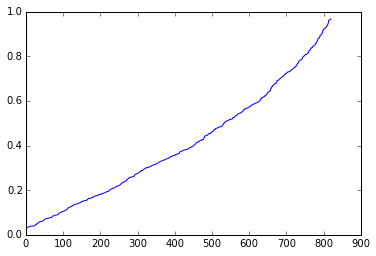

In [10]:
plt.plot(np.sort(music_data['valence']))

In [100]:
np.sort(music_data_40['valence'])

array([ 0.0336,  0.0356,  0.057 ,  0.0997,  0.13  ,  0.154 ,  0.167 ,
        0.172 ,  0.194 ,  0.195 ,  0.201 ,  0.211 ,  0.214 ,  0.217 ,
        0.219 ,  0.235 ,  0.277 ,  0.292 ,  0.301 ,  0.313 ,  0.321 ,
        0.327 ,  0.335 ,  0.343 ,  0.346 ,  0.349 ,  0.363 ,  0.369 ,
        0.375 ,  0.376 ,  0.38  ,  0.395 ,  0.396 ,  0.424 ,  0.545 ,
        0.549 ,  0.552 ,  0.553 ,  0.562 ,  0.597 ,  0.666 ,  0.711 ,
        0.719 ,  0.722 ,  0.846 ,  0.849 ,  0.895 ,  0.931 ,  0.933 ,
        0.939 ])

In [108]:
np.median(music_data_40['valence'])

0.34749999999999998

In [112]:
np.std(music_data_40['valence'])

0.24909953969447662

In [114]:
from sklearn.cluster import KMeans 

In [227]:
kmeans = KMeans(n_clusters=3)

In [228]:
X = music_data[['instrumentalness','popularity','tempo', 'speechiness']]

In [229]:
kmeans.fit(X) # fit input data
prediction = kmeans.predict(X) # get labels
print(kmeans.cluster_centers_)
print(prediction)


[[  2.44560088e-01   3.04767442e+01   1.50339702e+02   8.16887597e-02]
 [  3.12035979e-01   1.72452229e+01   9.54092548e+01   6.32324841e-02]
 [  7.08488919e-02   6.15582329e+01   1.08951622e+02   6.03216867e-02]]
[0 1 2 1 1 0 2 2 1 2 2 1 0 2 2 2 1 1 2 2 2 2 2 0 0 2 2 1 2 2 0 2 0 1 2 0 0
 2 1 1 2 2 2 0 2 2 1 1 2 0 0 0 2 1 0 2 2 2 2 2 2 2 0 2 2 2 2 0 0 2 2 2 1 0
 0 2 2 2 2 2 1 0 2 2 2 1 2 1 1 2 1 2 2 0 2 2 0 2 2 2 0 1 2 0 2 0 1 0 2 2 2
 0 0 1 0 1 0 2 1 1 0 0 2 1 0 2 2 1 0 0 2 1 2 1 0 2 2 2 1 0 0 2 0 0 0 2 1 0
 1 2 2 0 1 1 2 1 0 1 1 2 2 2 0 1 2 1 0 1 1 2 1 2 0 1 1 1 2 2 2 0 2 0 0 0 1
 1 0 2 2 1 0 2 0 2 2 1 2 2 0 1 1 2 0 0 0 2 0 2 0 1 1 1 1 1 0 2 2 2 2 2 0 2
 1 2 0 2 0 0 1 1 0 0 2 1 0 1 1 2 1 1 1 2 2 0 0 1 2 2 0 0 0 1 1 1 1 1 1 1 2
 2 2 0 2 2 1 2 2 2 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 2 2 0 0 2 1 1 2 2 0
 0 2 0 1 2 1 2 0 1 1 0 1 1 2 0 1 1 0 0 0 1 1 0 1 0 2 2 2 1 2 1 1 1 0 1 0 2
 1 2 1 1 2 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 2 2 0 1 1 1 0 2 2 2 2 0 2 2
 0 2 1 1 1 1 1 1 2 0 1 0 1 1 1 0 0 1

In [230]:
map_prediction_name = pd.DataFrame(music_data['name'])
map_prediction_name['artist'] = music_data['artist']
map_prediction_name['album'] = music_data['album']
map_prediction_name['prediction'] = prediction

In [231]:
map_prediction_name[map_prediction_name['artist'] == '']

,name,artist,album,prediction
2,Daydreamer,Adele,19,2
6,Make You Feel My Love,Adele,19,2
7,Chasing Pavements,Adele,19,2
9,Best For Last,Adele,19,2
10,My Same,Adele,19,2
14,First Love,Adele,19,2
15,Crazy For You,Adele,19,2
19,Melt My Heart To Stone,Adele,19,2
20,Tired,Adele,19,2
25,Cold Shoulder,Adele,19,2


In [207]:
music_data_40['name']

0                             Naan Yen
1                  Vishnu Sahasranamam
2                           Daydreamer
3                            Aao Balma
4                    Ennile Maha Oliyo
5                   Jagaao Mere Des Ko
6                Make You Feel My Love
7                    Chasing Pavements
8                               Zariya
9                        Best For Last
10                             My Same
11                        Nenjae Yezhu
12                        Soz O Salaam
13                       Steal My Girl
14                          First Love
15                       Crazy For You
16                        Aye Sinamika
17                Naetru Aval Irundhal
18       Every Teardrop Is a Waterfall
19              Melt My Heart To Stone
20                               Tired
21                         Amazing Day
22                          Photograph
23                     Mental Manadhil
24                       The Scientist
25                       